In [1]:

#1
import pandas as pd
df_sales_us = pd.read_csv("Sales_US.csv")
df_sales_ca = pd.read_csv("Sales_CA.csv")
df_factories = pd.read_csv("Candy_Factories.csv")
df_products = pd.read_csv("Candy_Products.csv")
df_customers = pd.read_csv("Customers.csv")
df_targets = pd.read_json("Candy_Targets.json")

#df_sales_us.head(3)
#df_sales_us.tail(5)

In [2]:

#2
print("Sales US shape:", df_sales_us.shape)
print("Sales CA shape:", df_sales_ca.shape)
print("Factories shape:", df_factories.shape)
print("Products shape:", df_products.shape)
print("Customers shape:", df_customers.shape)
print("Targets shape:", df_targets.shape)

print(df_sales_us.info())
print(df_sales_ca.info())
print(df_factories.info())
print(df_products.info())
print(df_customers.info())
print(df_targets.info())

df_sales_us.describe()


Sales US shape: (9994, 18)
Sales CA shape: (200, 16)
Factories shape: (5, 3)
Products shape: (15, 6)
Customers shape: (63, 4)
Targets shape: (3, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   int64  
 6   Country/Region  9994 non-null   object 
 7   City            9994 non-null   object 
 8   State/Province  9994 non-null   object 
 9   Postal Code     9994 non-null   int64  
 10  Division        9994 non-null   object 
 11  Region          9994 non-null   object 
 12  Product ID      9994 non-null   object 
 13  Product Name    9994 non-null   object 
 14  Sales           9994

,Row ID,Customer ID,Postal Code,Sales,Units,Gross Profit,Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,5100.428857,134439.463178,55190.371723,13.891369,3.789574,9.156317,4.735052
std,2937.744380,20252.151279,32063.705315,11.330017,2.225110,6.639372,5.056550
min,1.000000,100006.000000,1040.000000,1.250000,1.000000,0.250000,0.600000
25%,2570.250000,117157.750000,23223.000000,7.200000,2.000000,4.900000,2.400000
50%,5102.500000,133616.500000,56430.500000,10.800000,3.000000,7.470000,3.600000
75%,7643.750000,152072.000000,90008.000000,18.000000,5.000000,12.250000,5.700000
max,10193.000000,169999.000000,99301.000000,260.000000,14.000000,130.000000,130.000000


In [3]:

#3
def clean_column_name(string1):
  string1=string1.lower()
  string1=string1.replace(" ","_")
  string1=string1.strip()
  return string1

for df in [df_sales_us, df_sales_ca, df_factories, df_products, df_customers, df_targets]:
    df.columns = df.columns.to_series().apply(clean_column_name)

df_sales_us

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,country/region,city,state/province,postal_code,division,region,product_id,product_name,sales,units,gross_profit,cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4547,US-2023-167682-CHO-SCR-58000,2023-04-03,2028-09-29,Standard Class,167682,United States,Richmond,Indiana,47374,Chocolate,Interior,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,14.40,4,10.00,4.40
9990,4724,US-2023-147991-CHO-NUT-13000,2023-05-05,2028-10-29,Standard Class,147991,United States,Chattanooga,Tennessee,37421,Chocolate,Gulf,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,17.45,5,12.45,5.00
9991,5175,US-2023-152471-CHO-TRI-54000,2023-07-08,2028-12-28,Same Day,152471,United States,Jacksonville,Florida,32216,Chocolate,Gulf,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
9992,5178,US-2023-152471-CHO-TRI-54000,2023-07-08,2028-12-28,Same Day,152471,United States,Jacksonville,Florida,32216,Chocolate,Gulf,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,18.75,5,12.25,6.50


In [5]:
#3.2
shipping_prices = {
    "First Class": 10,
    "Second Class": 5,
    "Standard Class": 3,
    "Same Day": 20
}

df_sales_us["shipping_cost"] = df_sales_us["ship_mode"].map(shipping_prices)

In [6]:
#3.3
df_sales_us["sales_level"] = df_sales_us["sales"].apply(
    lambda x: "low" if x < 50
    else "med" if 50 <= x <= 200
    else "high"
)
df_sales_us

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,country/region,city,state/province,postal_code,division,region,product_id,product_name,sales,units,gross_profit,cost,shipping_cost,sales_level
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,3,low
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20,3,low
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40,3,low
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42,3,low
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28,10,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4547,US-2023-167682-CHO-SCR-58000,2023-04-03,2028-09-29,Standard Class,167682,United States,Richmond,Indiana,47374,Chocolate,Interior,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,14.40,4,10.00,4.40,3,low
9990,4724,US-2023-147991-CHO-NUT-13000,2023-05-05,2028-10-29,Standard Class,147991,United States,Chattanooga,Tennessee,37421,Chocolate,Gulf,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,17.45,5,12.45,5.00,3,low
9991,5175,US-2023-152471-CHO-TRI-54000,2023-07-08,2028-12-28,Same Day,152471,United States,Jacksonville,Florida,32216,Chocolate,Gulf,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,20,low
9992,5178,US-2023-152471-CHO-TRI-54000,2023-07-08,2028-12-28,Same Day,152471,United States,Jacksonville,Florida,32216,Chocolate,Gulf,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,18.75,5,12.25,6.50,20,low


In [7]:
#3.4
df_sales_us["total_price"]= df_sales_us["units"] * df_sales_us["cost"]
#3.5
df_sales_us['order_date'] = pd.to_datetime(df_sales_us['order_date'])
df_sales_us['order_year'] = df_sales_us['order_date'].dt.year
#3.6
df_sales_us["total_price_after_discount"] = df_sales_us.apply(
    lambda row: row["shipping_cost"] * 0.9 if row["units"] > 5 else row["total_price"],
    axis=1
)

In [8]:
#3.7
df_customers['address']=df_customers['address'].fillna("unknown")
df_customers
# 3.8
df_sales_us["ship_date"] = pd.to_datetime(df_sales_us["ship_date"],errors="coerce")
#df_sales_us.dtypes
# 3.9
df_sales_ca.dtypes
df_sales_ca["postal_code"] = (pd.to_numeric(df_sales_us["postal_code"], errors="coerce").astype("Int64"))

In [9]:

#4
sales = pd.concat([df_sales_us, df_sales_ca], ignore_index=True)
sales.head(3)

df_sales_customers = pd.merge(
    df_sales_us,
    df_customers,
    on="customer_id",
    how="left"
)

df_customers = df_customers.rename(columns={"age": "customer_age"})
df_customers

#df_customers["customer_city"] = (df_customers["address"].str.split(",", expand=True)[1].str.strip())
#df_customers

#df_customers["address"] = (df_customers["address"].str.split(",", expand=True)[0].str.strip())

#df_customers

final_customers = df_sales_customers.drop_duplicates(
    subset="customer_id"
)

In [10]:
#4.1
sales.loc[:, ["customer_id", "product_name", "units", "total_price"]]
sales.iloc[:5, 1:5]


,order_id,order_date,ship_date,ship_mode
0,US-2021-128055-CHO-TRI-54000,2021-03-31 00:00:00,2026-09-26 00:00:00,Standard Class
1,US-2021-128055-CHO-SCR-58000,2021-03-31 00:00:00,2026-09-26 00:00:00,Standard Class
2,US-2021-138100-CHO-FUD-51000,2021-09-15 00:00:00,2027-03-13 00:00:00,Standard Class
3,US-2021-138100-CHO-MIL-31000,2021-09-15 00:00:00,2027-03-13 00:00:00,Standard Class
4,US-2022-121391-CHO-MIL-31000,2022-10-04 00:00:00,2028-03-29 00:00:00,First Class


In [11]:
#4.2
filtered_orders = sales[
    (sales["units"] > 3) | (sales["total_price"] > 20)
][["product_name", "total_price"]]

filtered_orders


,product_name,total_price
7,Wonka Bar - Fudge Mallows,58.8
11,Wonka Bar - Milk Chocolate,28.5
16,Wonka Bar - Nutty Crunch Surprise,36.0
22,Wonka Bar - Triple Dazzle Caramel,32.5
29,Wonka Bar - Nutty Crunch Surprise,64.0
...,...,...
10188,Wonka Bar -Scrumdiddlyumptious,NaN
10189,Wonka Bar -Scrumdiddlyumptious,NaN
10190,Wonka Bar - Nutty Crunch Surprise,NaN
10192,Wonka Bar -Scrumdiddlyumptious,NaN


In [12]:
#4.3
division_sales = (df_sales_us.groupby("division")["sales"].sum().reset_index())

comparison_division = division_sales.merge(df_targets,on="division",how="left")

comparison_division["target_reached"] = (comparison_division["sales"] >= comparison_division["target"])
comparison_division

,division,sales,target,target_reached
0,Chocolate,129019.61,27000,True
1,Other,9383.25,3000,True
2,Sugar,427.48,15000,False


In [ ]:
#6
df_sales_us.groupby("product_name")["sales"].count().idxmax()
df_sales_us

df_sales_us.groupby(["city","countryregion"])["sales"].count()


df_sales_us["order_date"] = pd.to_datetime(df_sales_us["order_date"])

df_sales_us["month"] = df_sales_us["order_date"].dt.month

df_sales_us.groupby(["month"])["sales"].count()

In [15]:
sales_by_customer = df_sales_us.groupby("customer_id")["sales"].sum()
sales_by_customer.nlargest(5)

sales_by_customer.nsmallest(5)

customer_id
100587    1.25
128307    1.25
129910    1.25
140977    1.50
131499    1.99
Name: sales, dtype: float64

In [16]:
#6
df_sales_us.groupby(["customer_id"])["sales"].mean()

df_sales_us.groupby(["customer_id"])["total_price"].agg(["min","max","mean","sum"])

,min,max,mean,sum
customer_id,,,,
100006,11.70,11.70,11.700000,11.70
100013,1.10,4.40,3.300000,9.90
100041,1.14,10.80,5.446667,16.34
100048,4.56,41.04,18.800000,56.40
100055,5.20,9.90,7.550000,15.10
...,...,...,...,...
169943,16.00,72.96,32.832000,164.16
169957,17.60,36.00,28.700000,86.10
169971,1.30,10.80,6.050000,12.10


In [ ]:
#7
cities = df_sales_us[
[
  "countryregion",
  "city",
  "stateprovince",
  "postal_code",
  "region"
]
]
cities.to_csv("cities.csv", index=False)

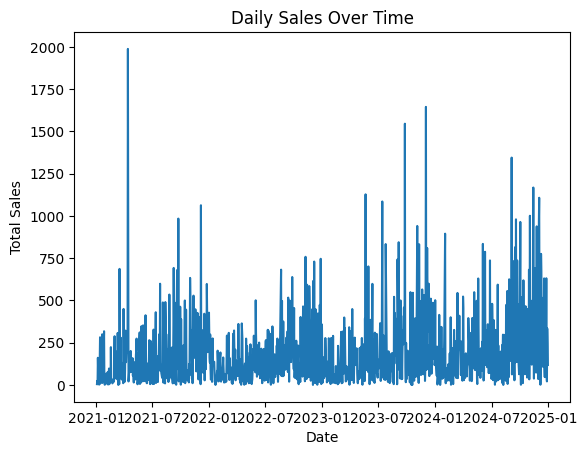

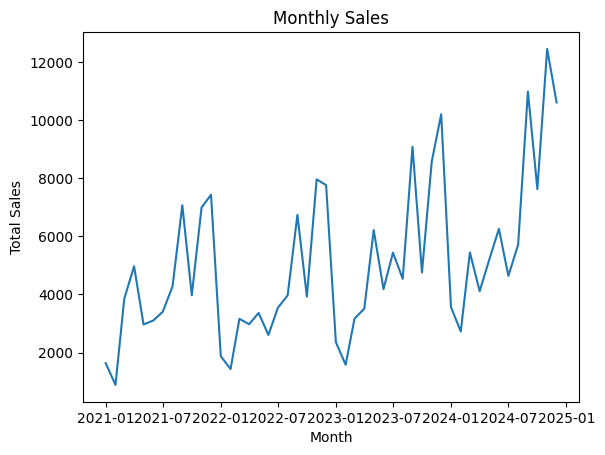

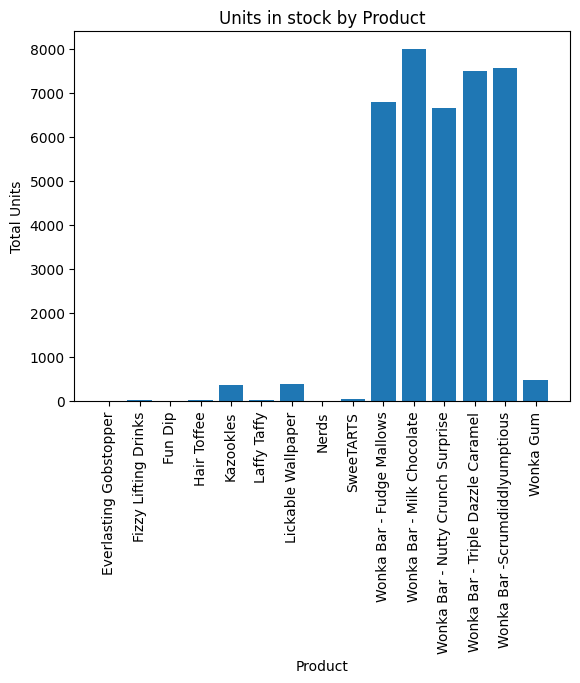

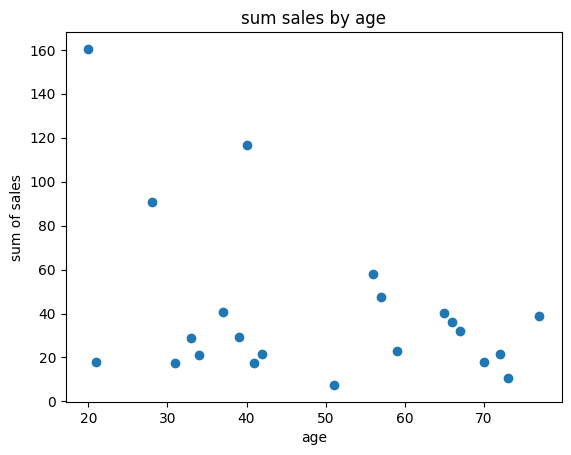

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#1-2
sales["order_date"] = pd.to_datetime(sales["order_date"])
daily_sales = (sales.groupby("order_date")["total_price"].sum())

plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.savefig("daily_sales.png")
plt.savefig("daily_sales.pdf")
plt.show()

#3
monthly_sales = (sales.groupby(sales["order_date"].dt.to_period("M"))["total_price"].sum())

plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#4
df_product_units=df_sales_us.groupby(["product_name"])["units"].sum()

plt.bar(df_product_units.index, df_product_units.values)
plt.title("Units in stock by Product")
plt.xlabel("Product")
plt.ylabel("Total Units")
plt.xticks(rotation=90)
plt.show()

age_by_sales = (pd.merge(
df_sales_us,
df_customers[["customer_id", "customer_age"]],on="customer_id",how="left")
  .groupby(["customer_age"])["sales"]
  .sum()
)
plt.scatter(age_by_sales.index,age_by_sales.values)
plt.title("sum sales by age")
plt.xlabel("age")
plt.ylabel("sum of sales")

plt.show()

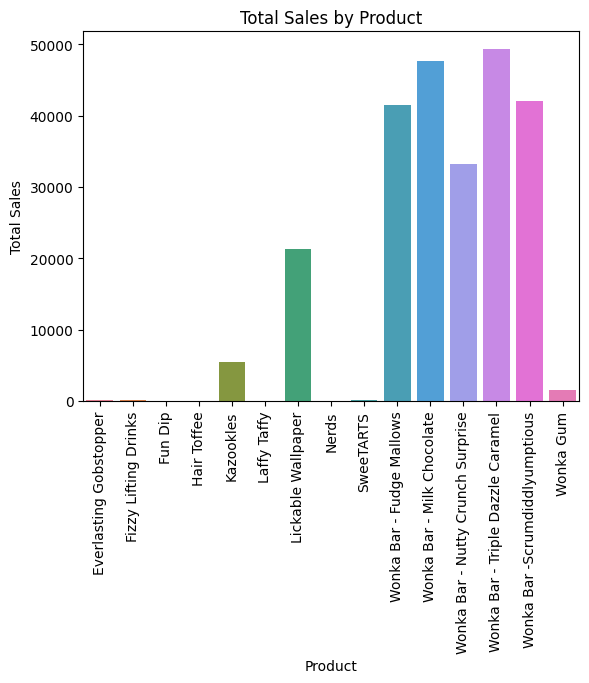

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_by_product = (sales.groupby("product_name")["total_price"].sum().reset_index())

sns.barplot(data=sales_by_product,x="product_name",y="total_price",hue="product_name",legend=False)

plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

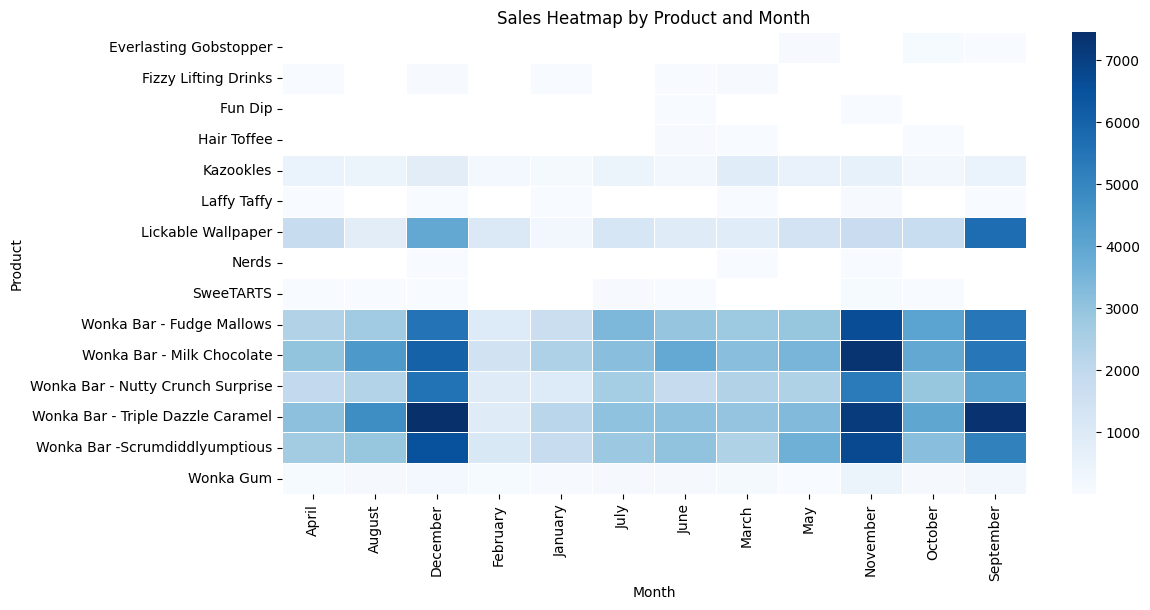

In [21]:
sales["order_date"] = pd.to_datetime(sales["order_date"])
sales["month"] = sales["order_date"].dt.month_name()

sales_pivot = (sales.groupby(["product_name", "month"])["total_price"] .sum()
.reset_index().pivot(
index="product_name",
columns="month",
values="total_price"))


plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot,cmap="Blues",linewidths=0.5)

plt.title("Sales Heatmap by Product and Month")
plt.xlabel("Month")
plt.ylabel("Product")
plt.show()


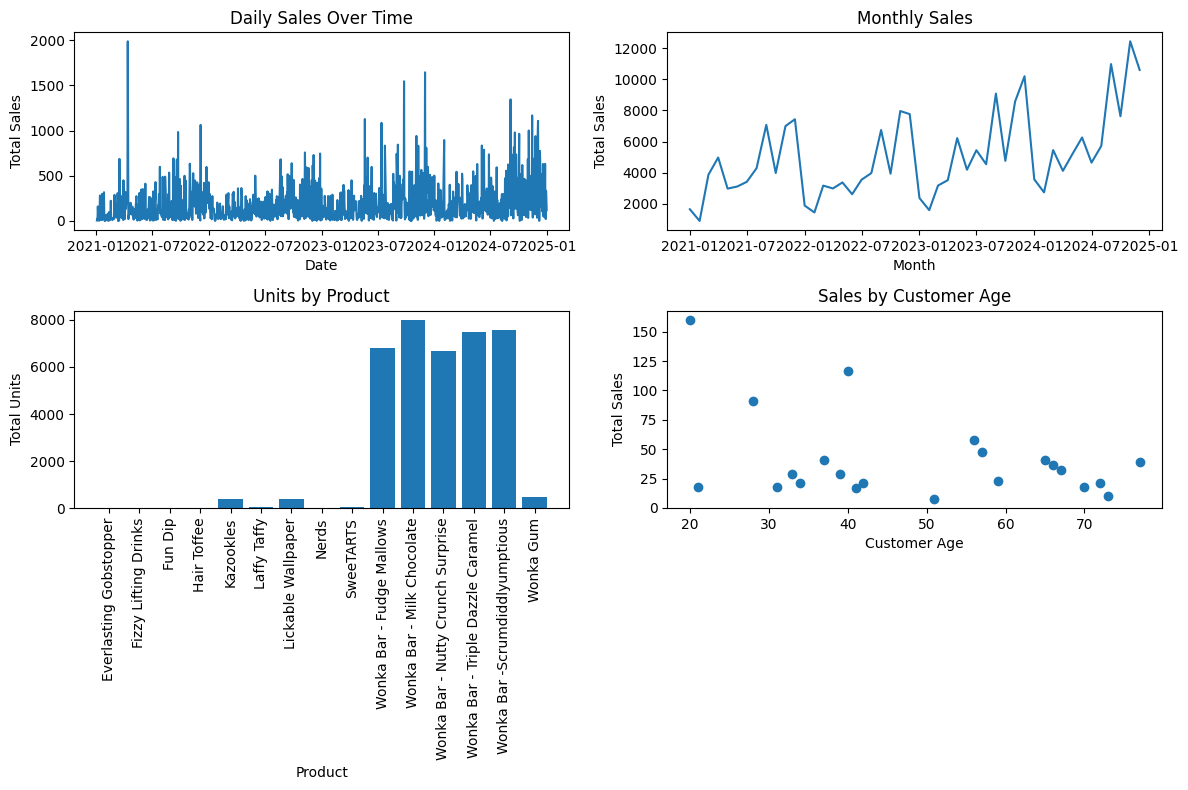

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(daily_sales.index, daily_sales.values)
axes[0, 0].set_title("Daily Sales Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Total Sales")

axes[0, 1].plot(monthly_sales.index.to_timestamp(),monthly_sales.values)
axes[0, 1].set_title("Monthly Sales")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Total Sales")

axes[1, 0].bar(df_product_units.index,df_product_units.values)
axes[1, 0].set_title("Units by Product")
axes[1, 0].set_xlabel("Product")
axes[1, 0].set_ylabel("Total Units")
axes[1, 0].tick_params(axis="x", rotation=90)

axes[1, 1].scatter(age_by_sales.index,age_by_sales.values)
axes[1, 1].set_title("Sales by Customer Age")
axes[1, 1].set_xlabel("Customer Age")
axes[1, 1].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()
